In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
# Load dataset 
df = pd.read_csv(r"C:\Users\ztech.pk\OneDrive\Documents\Dev Hub Internship tasks\House Price Prediction Dataset.csv")  
print(df.head())
print(df.info())  
print(df.describe())  

   Id  SquareFootage  Bedrooms  Bathrooms  Floors  YearBuilt  Location  \
0   1           1360         5          4       3       1970  Downtown   
1   2           4272         5          4       3       1958  Downtown   
2   3           3592         2          2       3       1938  Downtown   
3   4            966         4          2       2       1902  Suburban   
4   5           4926         1          4       2       1975  Downtown   

   Condition Garage   Price  
0  Excellent     No  149919  
1  Excellent     No  424998  
2       Good     No  266746  
3       Fair    Yes  244020  
4       Fair    Yes  636056  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             2000 non-null   int64 
 1   SquareFootage  2000 non-null   int64 
 2   Bedrooms       2000 non-null   int64 
 3   Bathrooms      2000 non-null   int64 
 4   Floor

In [5]:
df = df.dropna() 

In [6]:
features = ['SquareFootage', 'Bedrooms', 'Bathrooms', 'Location', 'YearBuilt']
target = 'Price'
X = df[features]
y = df[target]

In [7]:
X = pd.get_dummies(X, columns=['Location'], drop_first=True) 

In [22]:
# Feature Scaling (for better model performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
# Train Regresion Models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [25]:
# Gradient Boosting (Because It is more powerful)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [26]:
# Model Evaluation

# Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"Linear Regression MAE: {mae_lr}")
print(f"Gradient Boosting MAE: {mae_gb}")

Linear Regression MAE: 242813.58455674016
Gradient Boosting MAE: 245919.98972543172


In [27]:
# Root Mean Squared Error (RMSE)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Gradient Boosting RMSE: {rmse_gb}")

Linear Regression RMSE: 279334.58557086845
Gradient Boosting RMSE: 284044.362722733


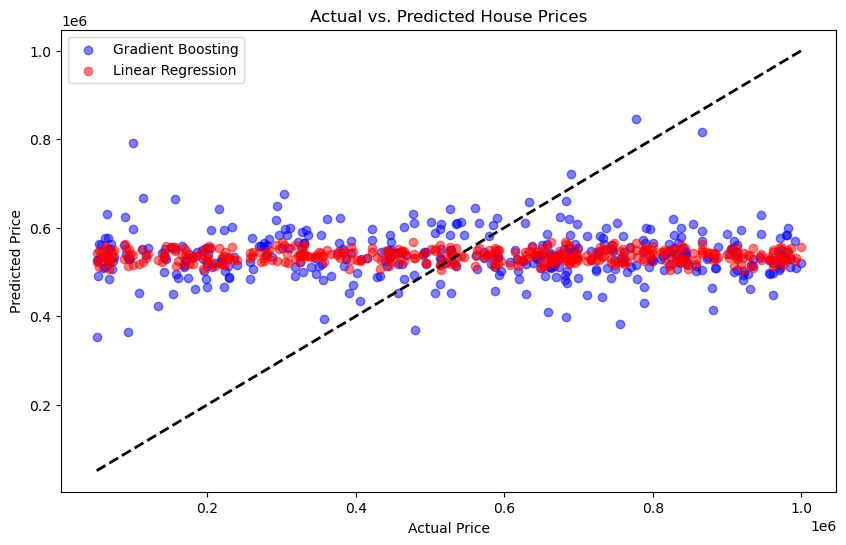

In [28]:
#  Visualize predicted prices compared to actual prices.

# Actual vs. Predicted Prices (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, color='blue', label='Gradient Boosting')
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='red', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.legend()
plt.show()

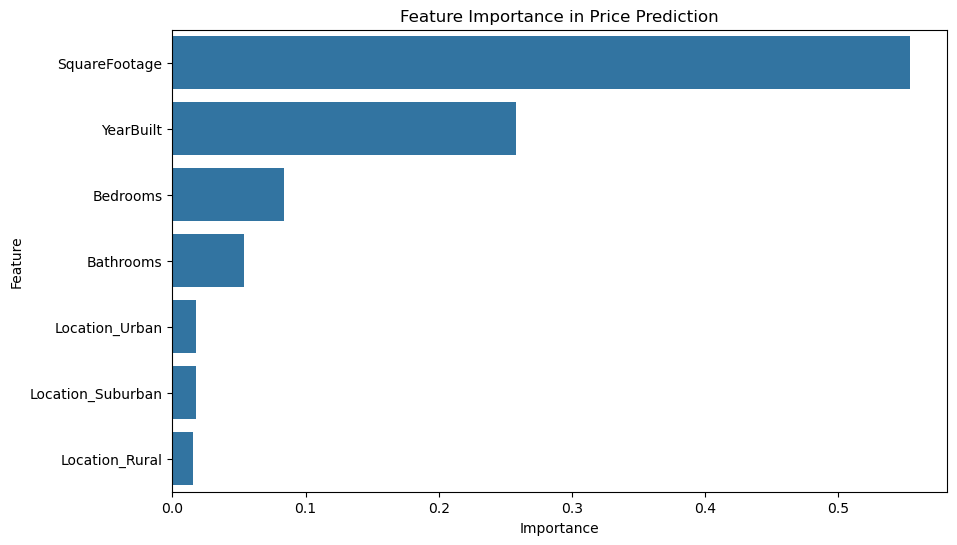

In [29]:
# Feature Importance (Gradient Boosting)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Price Prediction')
plt.show()